## Observations and Insights 

In [231]:
#Three observations or inferences that can be made from the data:
#There is a positive correlation between mouse weight and average tumor volume so based on weight, one could estimate tumor size.
#Capomulin and Ramicane were the most effective, and were quite similar, at reducing tumor volume.
#In mouse s185, the most dramatic time interval for tumor reduction is between day 5 and day 10. This could be further investigated with the larger data set.

In [232]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
study_data_complete

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [233]:
mouse_metadata.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16

In [234]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [235]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = study_data_complete
duplicate_mice.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [236]:
timepoint_number = duplicate_mice.groupby(["Mouse ID"])["Timepoint"].value_counts()


In [237]:
duplicate_mice_df = pd.DataFrame({"Number of Time Points": timepoint_number
                                                                 
                                   
                                 })
duplicate_mice_df.head()

Number of Time Points
Mouse ID Timepoint                       
a203     0                              1
         5                              1
         10                             1
         15                             1
         20                             1

In [238]:
duplicate_mice_df.loc[(duplicate_mice_df["Number of Time Points"]>1)]

Number of Time Points
Mouse ID Timepoint                       
g989     0                              2
         5                              2
         10                             2
         15                             2
         20                             2

In [239]:
# Optional: Get all the data for the duplicate mouse ID. 

dup_mouse = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
print(dup_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [240]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#to drop a in a dataframe by index
#df.drop([0,1]) would drop the rows with index 0 and 1
study_data_complete.set_index("Mouse ID", inplace=True)
study_data_complete.head()


Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
Mouse ID                                                         
k403         Ramicane  Male          21          16          0   
k403         Ramicane  Male          21          16          5   
k403         Ramicane  Male          21          16         10   
k403         Ramicane  Male          21          16         15   
k403         Ramicane  Male          21          16         20   

          Tumor Volume (mm3)  Metastatic Sites  
Mouse ID                                        
k403               45.000000                 0  
k403               38.825898                 0  
k403               35.014271                 1  
k403               34.223992                 1  
k403               32.997729                 1

In [241]:
study_data_complete1 = study_data_complete.drop(index='g989')


In [242]:
study_data_complete1 = study_data_complete1.reset_index(drop=False)
study_data_complete1.head(20)


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1

In [243]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete1["Mouse ID"].unique())


248

In [244]:
study_data_complete1["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [265]:
#FTV_mean = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
#FTV_median = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
#FTV_variance = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
#FTV_std = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
#FTV_sem = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
FTV_mean = study_data_complete1.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
FTV_median = study_data_complete1.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"]
FTV_variance = study_data_complete1.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"]
FTV_std = study_data_complete1.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"]
FTV_sem = study_data_complete1.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"]
FTV_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [266]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({"mean": FTV_mean,
                          "median": FTV_median,
                          "variance": FTV_variance,
                          "standard deviation": FTV_std,
                          "SEM": FTV_sem})

summary_df





mean     median   variance  standard deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398

In [267]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

study_data_complete1.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

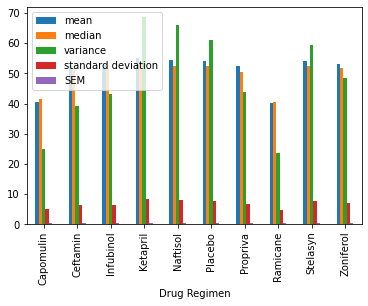

In [268]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas. Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the total number of measurements taken for each treatment regimen throughout the course of the study.
#NOTE: These plots should look identical.

df_statistic_bar = summary_df.plot.bar()

In [269]:
measurement_quantity = study_data_complete1['Drug Regimen'].value_counts()
measurement_quantity_df = pd.DataFrame(measurement_quantity)
measurement_quantity_df

Drug Regimen
Capomulin           230
Ramicane            228
Ketapril            188
Naftisol            186
Zoniferol           182
Stelasyn            181
Placebo             181
Infubinol           178
Ceftamin            178
Propriva            148

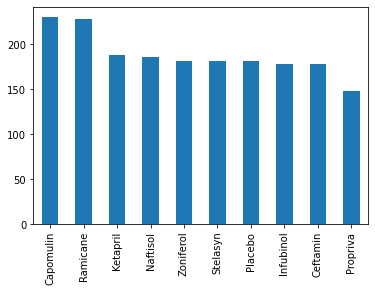

In [270]:
measurement_quantity = study_data_complete1['Drug Regimen'].value_counts()

df_bar = measurement_quantity.plot.bar()

([<matplotlib.axis.XTick at 0x2c0c7016ee0>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ramicane'),
  Text(0, 0, 'Ketapril'),
  Text(0, 0, 'Naftisol'),
  Text(0, 0, 'Zoniferol'),
  Text(0, 0, 'Stelasyn'),
  Text(0, 0, 'Placebo'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Propriva')])

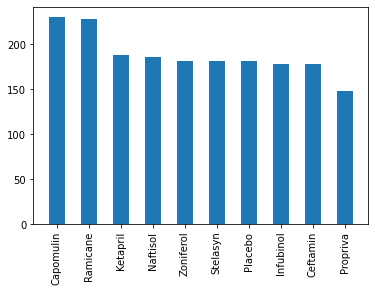

In [251]:
y_axis = measurement_quantity_df["Drug Regimen"]
x_axis = np.arange(len(measurement_quantity_df.index))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, y_axis, width=0.5, alpha=1, align="center")

plt.xticks(tick_locations, measurement_quantity_df.index, rotation="vertical")


In [252]:
study_data_complete1["Sex"].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

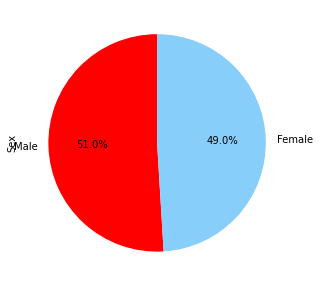

In [253]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["red", "lightskyblue"]
labels = ["male", "female"]
sex = study_data_complete1["Sex"].value_counts()
plot = sex.plot.pie(y= sex, autopct='%1.1f%%', colors=colors, figsize=(5, 5), startangle=90)

([<matplotlib.patches.Wedge at 0x2c0c70577f0>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'male'),
  Text(1.0995024239828841, 0.033082014082615026, 'female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

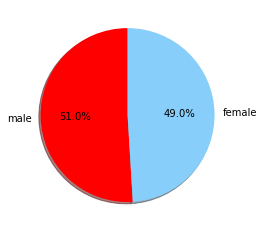

In [254]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes = study_data_complete1["Sex"].value_counts()
colors = ["red", "lightskyblue"]
labels = ["male", "female"]
plt.pie(sexes, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)

## Quartiles, Outliers and Boxplots

In [255]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
##FTV_mean = study_data_complete1[(study_data_complete1['Timepoint'] == 45)].groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"]
##dup_mouse = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
##mice = study_data_complete.loc[study_data_complete["Drug Regimen"] == "Capomulin", :]
mice_45 = study_data_complete1[(study_data_complete1['Timepoint'] == 45)]
mice_capomulin = mice_45.loc[mice_45["Drug Regimen"] == "Capomulin", :]
mice_ramicane = mice_45.loc[mice_45["Drug Regimen"] == "Ramicane", :]
mice_infubinol = mice_45.loc[mice_45["Drug Regimen"] == "Infubinol", :]
mice_ceftamin = mice_45.loc[mice_45["Drug Regimen"] == "Ceftamin", :]

##mice_45_regimen2 = pd.merge(mice_capomulin, mice_ramicane, how="outer", on=["'Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'"])
##mice_45_regimen2 = mice_capomulin.merge(mice_ramicane, on=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites' ])
mice_45_regimen2  = pd.merge(left=mice_capomulin, right=mice_ramicane, on=['Mouse ID','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], how='outer')
mice_45_regimen3  = pd.merge(left=mice_45_regimen2, right=mice_infubinol, on=['Mouse ID','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], how='outer')
mice_45_regimen4  = pd.merge(left=mice_45_regimen3, right=mice_ceftamin, on=['Mouse ID','Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], how='outer')
mice_45_regimen4

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      s185    Capomulin  Female           3          17         45   
1      x401    Capomulin  Female          16          15         45   
2      m601    Capomulin    Male          22          17         45   
3      u364    Capomulin    Male          18          17         45   
4      y793    Capomulin    Male          17          17         45   
..      ...          ...     ...         ...         ...        ...   
58     w151     Ceftamin    Male          24          25         45   
59     x581     Ceftamin  Female          19          28         45   
60     x822     Ceftamin    Male           3          29         45   
61     y769     Ceftamin  Female           6          27         45   
62     y865     Ceftamin    Male          23          26         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            23.343598                 1  
1            28.484033                 0  
2            28.430964                 1  
3            31.023923                 3  
4            31.896238                 2  
..                 ...               ...  
58           67.527482                 3  
59           64.634949                 3  
60           61.386660                 3  
61           68.594745                 4  
62           64.729837                 3  

[63 rows x 8 columns]

In [256]:
# Put treatments into a list for for loop (and later for plot labels)

regimen_list = mice_45_regimen4["Drug Regimen"].unique()

# Create empty list to fill with tumor vol data (for plotting)

TVD = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    FTV1 = mice_45_regimen4.loc[mice_45_regimen4["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    TVD.append(FTV1)
    
    # Determine outliers using upper and lower bounds
    quartiles = FTV1.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile of final tumor volumes is: {lowerq}")
    print(f"The upper quartile of final tumor volumes is: {upperq}")
    print(f"The interquartile range of final tumor volumes is: {iqr}")
    print(f"The the median of final tumor volumes is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volumes is: 32.37735684
The upper quartile of final tumor volumes is: 40.1592203
The interquartile range of final tumor volumes is: 7.781863460000004
The the median of final tumor volumes is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of final tumor volumes is: 30.981175224999998
The upper quartile of final tumor volumes is: 38.508305307499995
The interquartile range of final tumor volumes is: 7.527130082499998
The the median of final tumor volumes is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
The lower quartile of final tumor volumes is: 62.75445141
The upper quartile of final tumor volumes is: 67.68556862
The interquartile range of final tumor volumes is: 4.9311172099999965
The the median of final tumor volumes is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 7

In [257]:
#TVD

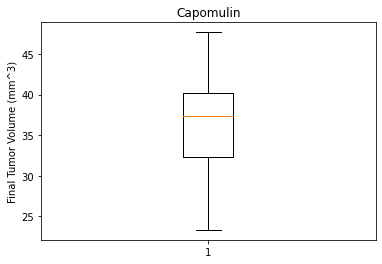

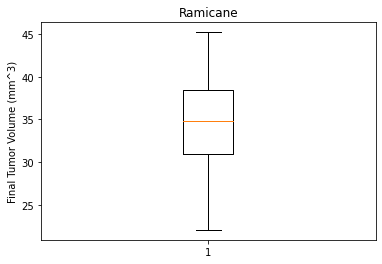

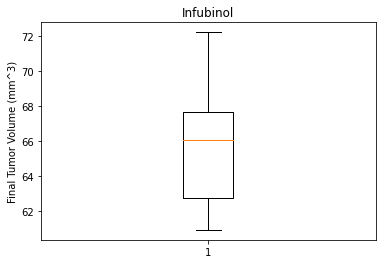

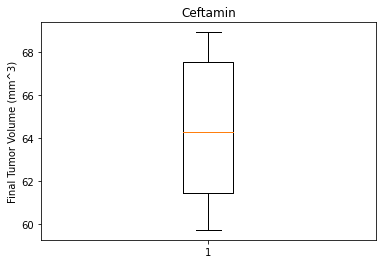

In [258]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
##temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
##temperatures = temperature_df['HourlyDryBulbTemperature']

FTVC = mice_45_regimen4.loc[mice_45_regimen4["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
FTVR = mice_45_regimen4.loc[mice_45_regimen4["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
FTVI = mice_45_regimen4.loc[mice_45_regimen4["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
FTVE = mice_45_regimen4.loc[mice_45_regimen4["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin')
ax1.set_ylabel('Final Tumor Volume (mm^3)')
ax1.boxplot(FTVC)

fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane')
ax2.set_ylabel('Final Tumor Volume (mm^3)')
ax2.boxplot(FTVR)

fig2, ax2 = plt.subplots()
ax2.set_title('Infubinol')
ax2.set_ylabel('Final Tumor Volume (mm^3)')
ax2.boxplot(FTVI)

fig2, ax2 = plt.subplots()
ax2.set_title('Ceftamin')
ax2.set_ylabel('Final Tumor Volume (mm^3)')
ax2.boxplot(FTVE)

plt.show()


## Line and Scatter Plots

In [259]:
s185_mouse = study_data_complete1.loc[study_data_complete1["Mouse ID"] == "s185", :]
print(s185_mouse)

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14 

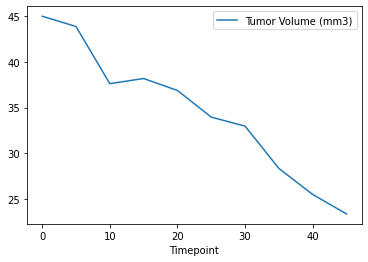

In [260]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_mouse.plot(x="Timepoint", y="Tumor Volume (mm3)")

In [261]:
ATV_Capo = study_data_complete1.loc[study_data_complete1["Drug Regimen"] == "Capomulin", :]
ATV_Capo.head()

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   

    Tumor Volume (mm3)  Metastatic Sites  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0

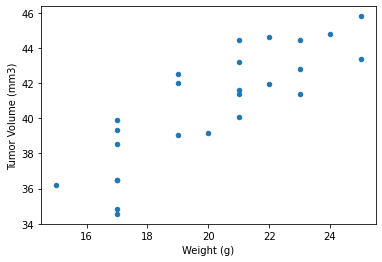

In [262]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capo_Scatter = ATV_Capo.groupby(['Mouse ID']).mean()
Capo_Scatter.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind = "scatter")

## Correlation and Regression

In [263]:
from scipy.stats import linregress, pearsonr


The r-squared is: 0.7088568047708717


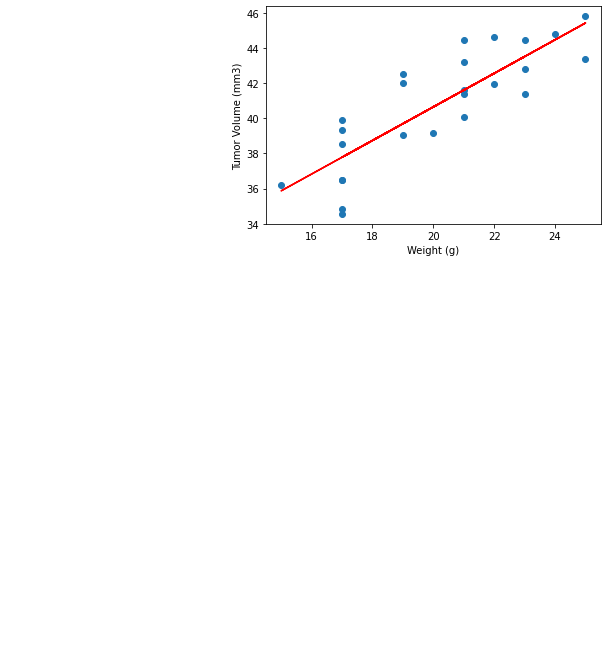

In [264]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = Capo_Scatter['Weight (g)']
y_values = Capo_Scatter['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
